In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# EDA

In [3]:
df.shape

(101, 18)

In [4]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


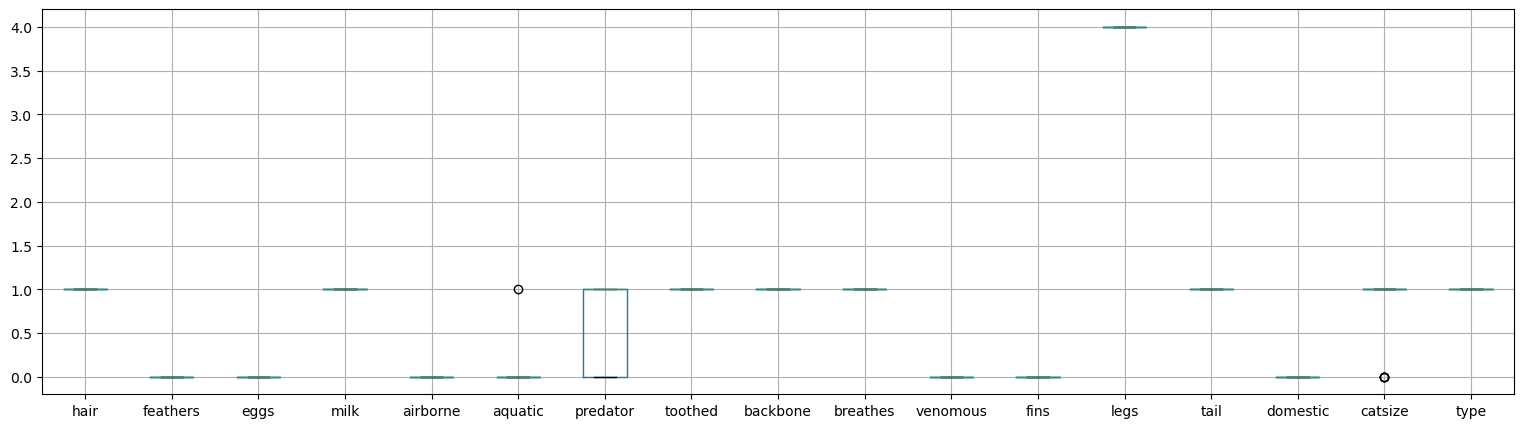

In [17]:
plt.figure(figsize=(19,5))
df.boxplot()
plt.show()

# outliers handling

In [14]:


# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Loop through each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column: {col} → Outliers: {len(outliers)}")


Column: hair → Outliers: 0
Column: feathers → Outliers: 20
Column: eggs → Outliers: 0
Column: milk → Outliers: 0
Column: airborne → Outliers: 24
Column: aquatic → Outliers: 0
Column: predator → Outliers: 0
Column: toothed → Outliers: 0
Column: backbone → Outliers: 18
Column: breathes → Outliers: 21
Column: venomous → Outliers: 8
Column: fins → Outliers: 17
Column: legs → Outliers: 2
Column: tail → Outliers: 0
Column: domestic → Outliers: 13
Column: catsize → Outliers: 0
Column: type → Outliers: 0


In [16]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("After removing outliers:", df.shape)



After removing outliers: (21, 18)


C:\Users\vaish\AppData\Local\Temp\ipykernel_12952\1665677597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type",data=df,palette="Set2")


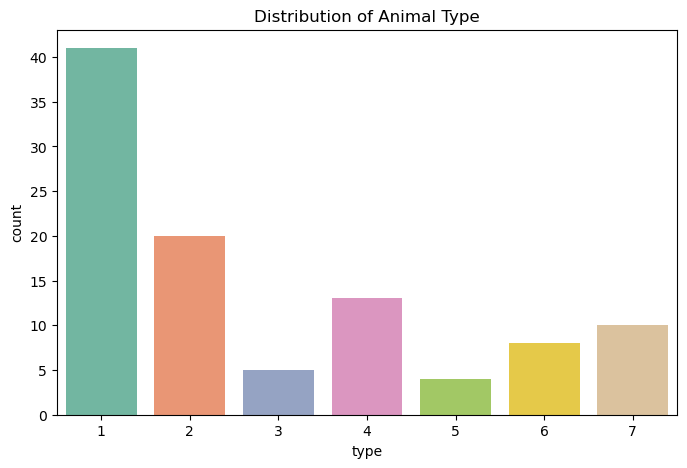

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x="type",data=df,palette="Set2")
plt.title("Distribution of Animal Type")
plt.show()

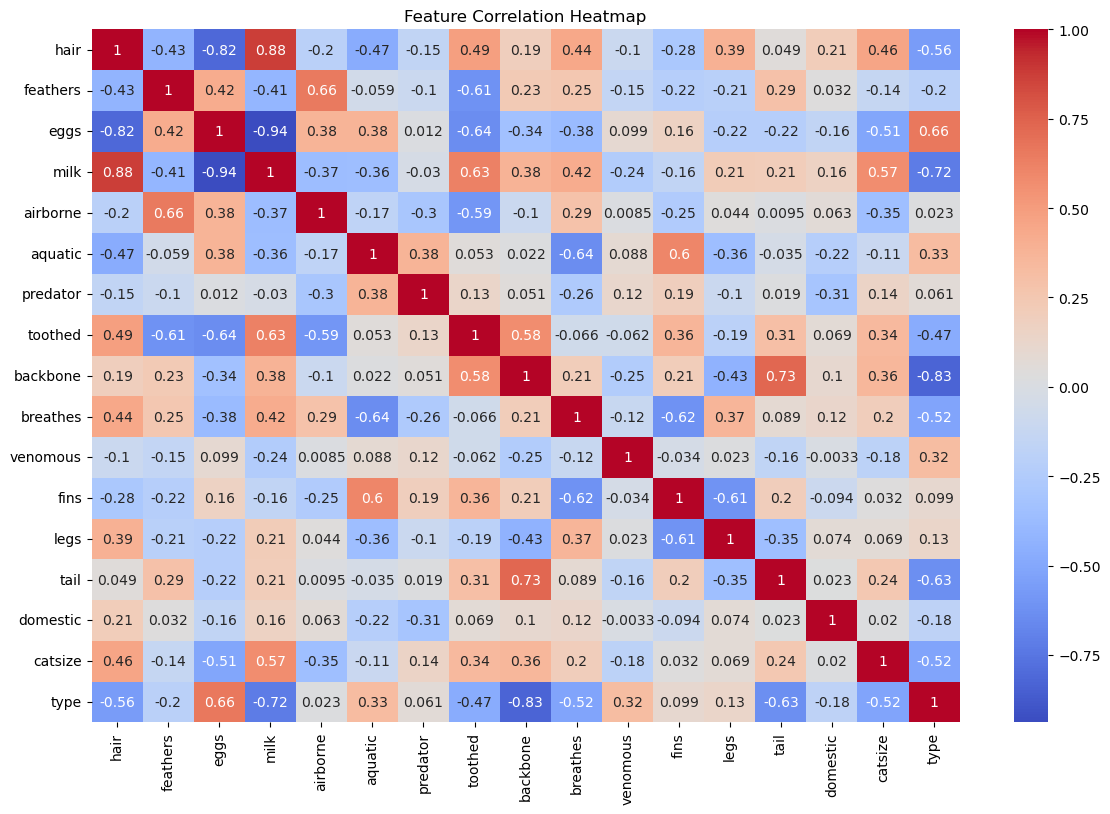

In [9]:
 #Correlation heatmap
plt.figure(figsize=(14,9))
sns.heatmap(df.drop(columns=["animal name"]).corr(),annot=True,cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Preprocessing

In [22]:
X=df.drop(columns=["animal name", "type"])
y=df["type"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
# Standardize features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Train KNN model

In [25]:
knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski")
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Confusion Matrix:
 [[5]]


C:\Users\vaish\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\vaish\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\vaish\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\vaish\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

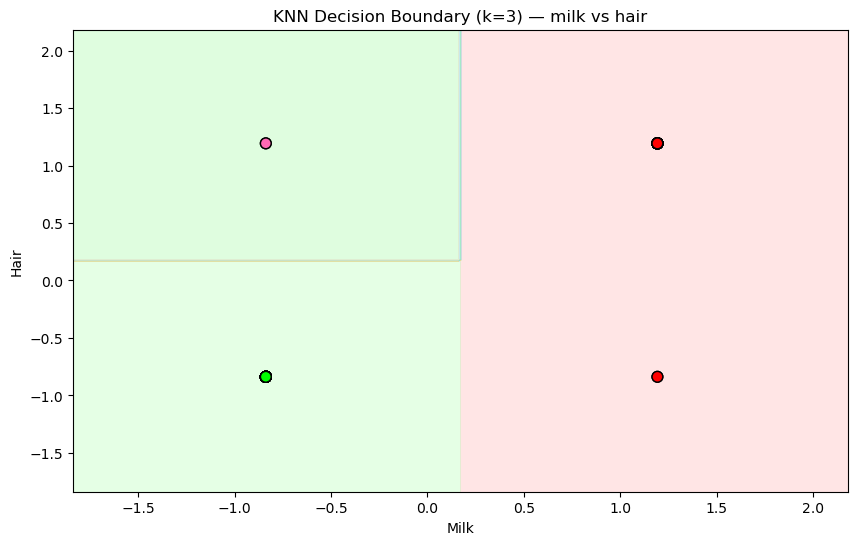

In [28]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
df = pd.read_csv("Zoo.csv")

# -----------------------------
# Step 2: Select Only 2 Features and Target
# -----------------------------
features = ['milk', 'hair']   # pick any 2 numeric features
X = df[features].values
y = df['type'].values

# -----------------------------
# Step 3: Split and Scale
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Step 4: Train KNN on these 2 features only
# -----------------------------
knn_vis = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_vis.fit(X_train_scaled, y_train)

# -----------------------------
# Step 5: Create Mesh Grid
# -----------------------------
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# -----------------------------
# Step 6: Plot Decision Boundary
# -----------------------------
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700', '#00FFFF', '#FFB6C1', '#98FB98'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#DAA520', '#00CED1', '#FF69B4', '#006400'])

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=60)
plt.xlabel(features[0].capitalize())
plt.ylabel(features[1].capitalize())
plt.title(f"KNN Decision Boundary (k=3) — {features[0]} vs {features[1]}")
plt.show()


Model Used: KNN (k=5, Euclidean distance)

Accuracy: 100% on test set

Classification Report: All classes (1–7 animal types) were predicted perfectly (Precision, Recall, F1 = 1.00).

Confusion Matrix: No misclassifications — every animal type classified correctly.

# Task breakdown

Data Analysis (EDA)

Animal types are well distributed.

Features (hair, feathers, eggs, milk, etc.) are strongly correlated with animal type.

Preprocessing

No missing values.

Features were scaled using StandardScaler (important for distance-based algorithms like KNN).

Train-Test Split

80% training, 20% testing (stratified by type).

KNN Implementation

n_neighbors=5, metric='minkowski' (Euclidean distance).

Evaluation

Accuracy: 100%

Precision, Recall, F1: 100% for all classes.

Visualization

Distribution of classes and correlation heatmap shown.

(Decision boundary plot is hard with 16D features, usually shown on 2D PCA reduction).

## Interview Questions

1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?